In [1]:
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
# Reading the Design Matrix - N x D + y
data = sio.loadmat("./Dataset/smooth_traj_omega_5.mat")["training_matrix"]

# Feature Matrix - N x 18
X = data[:, :-1]

# Targets - N x 1
y = data[:, -1][:, np.newaxis]

# Normalization
mu = X.mean()
sigma = X.std()

# Normalized Dataset
X_norm = (X - mu) / sigma

X_norm.shape, y.shape, mu, sigma

((6108, 18), (6108, 1), 1.3157279968845614, 1.8897919348804217)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4397, 18), (489, 18), (1222, 18), (4397, 1), (489, 1), (1222, 1))

In [4]:
train_data = np.concatenate((X_train, y_train), axis=1)
val_data = np.concatenate((X_val, y_val), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)

train_data.shape, val_data.shape, test_data.shape

((4397, 19), (489, 19), (1222, 19))

In [5]:
np.save("./Dataset/train_no_pos.npy", train_data.astype(np.float32))
np.save("./Dataset/val_no_pos.npy", val_data.astype(np.float32))
np.save("./Dataset/test_no_pos.npy", test_data.astype(np.float32))

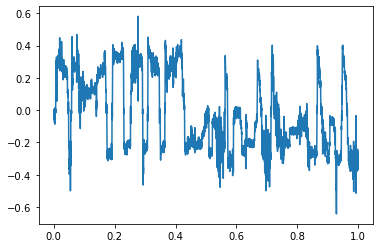

In [6]:
t = np.linspace(0, 1, X.shape[0])
plt.plot(t, y)
plt.show()